In [1]:
import pandas as pd

# Ted Talk Models with Date-Time Parts

In [2]:
ted_data_with_dates = pd.read_feather('ted_data_with_dates')

In [3]:
ted_data_with_dates.head()

,views,comments,duration,film_date,languages,num_speaker,published_date,Funny_ratings,Beautiful_ratings,Ingenious_ratings,...,film_Day,film_Dayofweek,film_Dayofyear,film_Is_month_end,film_Is_month_start,film_Is_quarter_end,film_Is_quarter_start,film_Is_year_end,film_Is_year_start,film_Elapsed
0,47227110,4553,1164,1140825600,60,1,1151367060,19645.0,4573.0,6073.0,...,24,4,55,False,False,False,False,False,False,1140807600
1,3200520,265,977,1140825600,43,1,1151367060,544.0,58.0,56.0,...,24,4,55,False,False,False,False,False,False,1140807600
2,1636292,124,1286,1140739200,26,1,1151367060,964.0,60.0,183.0,...,23,3,54,False,False,False,False,False,False,1140721200
3,1697550,200,1116,1140912000,35,1,1151367060,59.0,291.0,105.0,...,25,5,56,False,False,False,False,False,False,1140894000
4,12005869,593,1190,1140566400,48,1,1151440680,1390.0,942.0,3202.0,...,21,1,52,False,False,False,False,False,False,1140548400


In [4]:
ted_data_with_dates.isnull().values.any()

False

In [5]:
with_dates_y = ted_data_with_dates.views
with_dates_X = ted_data_with_dates.drop(columns=['views'])

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
with_dates_X_train, with_dates_X_test, with_dates_y_train, with_dates_y_test = train_test_split(with_dates_X, with_dates_y, test_size=0.3, random_state=35)

In [8]:
from sklearn.feature_selection import RFECV
model = LinearRegression(n_jobs = -1)
rfecv = RFECV(model, cv = 5)
with_dates_X_train_rfecv = rfecv.fit(with_dates_X_train,with_dates_y_train)

In [9]:
grid_scores = with_dates_X_train_rfecv.grid_scores_
x_value_range = list(range(0, len(grid_scores)))[::-1]

In [10]:
from graph import trace_values, plot
score_trace = trace_values(x_value_range, grid_scores)
plot([score_trace])

In [11]:
grid_scores

array([ 0.00323572,  0.00319562, -0.00180886, -0.00174247,  0.00856044,
        0.01251351,  0.01461937,  0.01765656,  0.01956702,  0.02059315,
        0.02688608,  0.0274282 ,  0.03646754,  0.03492665,  0.03507526,
        0.03479828,  0.03711711,  0.03744383,  0.03935547,  0.03784803,
        0.03932487,  0.03979087,  0.04091977,  0.07437175,  0.07480646,
        0.07492398,  0.10055515,  0.11674803,  0.11722763,  0.1160533 ,
        0.14678487,  0.14754039,  0.14946107,  0.14955397,  0.17712016,
        0.17597178,  0.17673991,  0.25305571,  0.25524797,  0.25278559,
        0.24503461,  0.24713007,  0.28792516,  0.40027524,  0.40069134,
        0.42802545,  0.41196912,  0.45170068,  0.50042108,  0.49490448,
        0.55890052,  0.55916573,  0.57128102,  0.57134023,  0.61184672,
        0.63195095,  0.65648066,  0.6579844 ,  0.66984351,  0.6705467 ,
        0.67747121,  0.67517724,  0.67246466,  0.66898693,  0.66861908,
        0.66974101,  0.66992681,  0.67107797,  0.64975497,  0.65

In [12]:
with_dates_X_train, with_dates_X_validate, with_dates_y_train, with_dates_y_validate = train_test_split(with_dates_X_train, with_dates_y_train, test_size=0.3, random_state=35)

In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import numpy as np

selectors = []

for idx in list(range(1, 71, 1))[::-1]:
    # 1. create an estimator
    estimator = LinearRegression(n_jobs=-1)
    # 2. perform rfe with the idx number of features
    rfe = RFE(estimator, idx, step=1)
    # 3. reduce the dataset to the number of features
    with_dates_X_train_rfe = rfe.fit_transform(with_dates_X_train,with_dates_y_train)
    with_dates_X_validate_rfe = rfe.transform(with_dates_X_validate)
    # 4. compute the accuracy score and append to the list
    estimator.fit(with_dates_X_train_rfe,with_dates_y_train)
    score = estimator.score(with_dates_X_validate_rfe,with_dates_y_validate)
    selectors.append(np.array([rfe, score, idx]))

In [14]:
wrapped_selectors = np.array(selectors)

In [15]:
y_values = wrapped_selectors[:, 1]
x_values = wrapped_selectors[:, -1]

In [16]:
from graph import trace_values, plot
trace = trace_values(x_values, y_values)
plot([trace])

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ted_data_with_dates)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning:

Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.



StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
scaled_data_with_dates = scaler.fit_transform(ted_data_with_dates)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning:

Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning:

Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.



In [19]:
scaled_X_with_dates = scaled_data_with_dates[:, 1:]
scaled_y_with_dates = scaled_data_with_dates[:, 0]

In [20]:
with_dates_scaled_X_train, with_dates_scaled_X_test, with_dates_scaled_y_train, with_dates_scaled_y_test = train_test_split(scaled_X_with_dates, scaled_y_with_dates, test_size=0.3, random_state=35)

In [21]:
with_dates_scaled_X_train, with_dates_scaled_X_validate, with_dates_scaled_y_train, with_dates_scaled_y_validate = train_test_split(with_dates_scaled_X_train, with_dates_scaled_y_train, test_size=0.3, random_state=35)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
model = LinearRegression(n_jobs = -1)
rfecv = RFECV(model, cv = 5)
X_train_rfecv = rfecv.fit(with_dates_scaled_X_train,with_dates_scaled_y_train)

In [23]:
grid_scores = X_train_rfecv.grid_scores_

In [24]:
grid_scores

array([-0.00480953, -0.00732049, -0.00684815, -0.00997319, -0.01543213,
       -0.01001745,  0.15930825,  0.17720816,  0.28107533,  0.48207179,
        0.49590107,  0.54152715,  0.5803895 ,  0.59070055,  0.61822271,
        0.64735509,  0.64682259,  0.64642226,  0.63718898,  0.66194677,
        0.6641003 ,  0.65926852,  0.65292629,  0.66038101,  0.65616542,
        0.6562109 ,  0.65418051,  0.65568624,  0.65795321,  0.65903392,
        0.64717343,  0.64588369,  0.64628309,  0.64487365,  0.66567028,
        0.66555483,  0.6664596 ,  0.66674208,  0.66625017,  0.66437463,
        0.66498013,  0.66407135,  0.66386268,  0.6630815 ,  0.6617951 ,
        0.66251429,  0.66161159,  0.66089737,  0.66076349,  0.66096248,
        0.6614872 ,  0.66117395,  0.66130209,  0.66137019,  0.66122369,
        0.66133107,  0.66148706,  0.66158231,  0.66152071,  0.66136534,
        0.66137844,  0.66129165,  0.6611315 ,  0.66109415,  0.66104605,
        0.66103718,  0.66101628,  0.66099555,  0.66100291,  0.66

In [25]:
x_value_range = list(range(0, len(grid_scores)))[::-1]

In [26]:
from graph import trace_values, plot
score_trace = trace_values(x_value_range[-50:], grid_scores[-50:])
plot([score_trace])

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import numpy as np

selectors = []

for idx in list(range(1, 71, 1))[::-1]:
    # 1. create an estimator
    estimator = LinearRegression(n_jobs=-1)
    # 2. perform rfe with the idx number of features
    rfe = RFE(estimator, idx, step=1)
    # 3. reduce the dataset to the number of features
    scaled_X_train_rfe = rfe.fit_transform(with_dates_scaled_X_train,with_dates_scaled_y_train)
    scaled_X_validate_rfe = rfe.transform(with_dates_scaled_X_validate)
    # 4. compute the accuracy score and append to the list
    estimator.fit(scaled_X_train_rfe,with_dates_scaled_y_train)
    score = estimator.score(scaled_X_validate_rfe,with_dates_scaled_y_validate)
    selectors.append(np.array([rfe, score, idx]))

In [28]:
wrapped_selectors = np.array(selectors)

In [29]:
y_values = wrapped_selectors[:, 1]
x_values = wrapped_selectors[:, -1]

In [30]:
from graph import trace_values, plot
trace = trace_values(x_values, y_values)
plot([trace])

In [31]:
wrapped_selectors[-13, 0].estimator_.coef_

array([ 4.55678584e+02,  5.48871058e+02,  2.02673315e-01,  2.03868222e-01,
        3.37904505e-01,  2.75761138e-01, -1.24760973e+02, -1.16546979e+01,
       -4.24498177e+02, -2.70535308e-01,  5.69424409e-01, -3.10159760e-01,
       -4.55677566e+02])

In [32]:
support = wrapped_selectors[-13, 0].get_support()

In [33]:
import numpy as np
feature_names = np.array(with_dates_X.columns) # transformed list to array
names = feature_names[support]

In [34]:
names

array(['film_date', 'published_date', 'Funny_ratings',
       'Informative_ratings', 'Fascinating_ratings', 'OK_ratings',
       'published_Year', 'published_Dayofyear', 'published_Elapsed',
       'film_Month', 'film_Week', 'film_Dayofyear', 'film_Elapsed'],
      dtype=object)

In [35]:
names = feature_names[support]
reduced_X = with_dates_X[names]

In [36]:
reduced_X.corr(method = 'spearman')

,film_date,published_date,Funny_ratings,Informative_ratings,Fascinating_ratings,OK_ratings,published_Year,published_Dayofyear,published_Elapsed,film_Month,film_Week,film_Dayofyear,film_Elapsed
film_date,1.000000,0.987641,-0.132859,0.011487,-0.144416,-0.265212,0.983038,0.009338,0.987641,0.231479,0.281099,0.279054,1.000000
published_date,0.987641,1.000000,-0.133926,-0.008367,-0.160553,-0.276608,0.995651,0.003653,1.000000,0.224564,0.271183,0.268861,0.987641
Funny_ratings,-0.132859,-0.133926,1.000000,0.271243,0.495843,0.479794,-0.128183,-0.040691,-0.133926,-0.105681,-0.110341,-0.108493,-0.132859
Informative_ratings,0.011487,-0.008367,0.271243,1.000000,0.617411,0.446531,-0.004373,-0.013612,-0.008367,-0.006213,-0.001086,-0.000894,0.011487
Fascinating_ratings,-0.144416,-0.160553,0.495843,0.617411,1.000000,0.457090,-0.155453,-0.023426,-0.160553,-0.116747,-0.111071,-0.112296,-0.144416
OK_ratings,-0.265212,-0.276608,0.479794,0.446531,0.457090,1.000000,-0.271299,-0.017279,-0.276608,-0.121692,-0.125069,-0.124442,-0.265212
published_Year,0.983038,0.995651,-0.128183,-0.004373,-0.155453,-0.271299,1.000000,-0.087330,0.995651,0.216815,0.263785,0.261446,0.983038
published_Dayofyear,0.009338,0.003653,-0.040691,-0.013612,-0.023426,-0.017279,-0.087330,1.000000,0.003653,0.086261,0.082444,0.082605,0.009338
published_Elapsed,0.987641,1.000000,-0.133926,-0.008367,-0.160553,-0.276608,0.995651,0.003653,1.000000,0.224564,0.271183,0.268861,0.987641
film_Month,0.231479,0.224564,-0.105681,-0.006213,-0.116747,-0.121692,0.216815,0.086261,0.224564,1.000000,0.985141,0.988475,0.231479


In [37]:
import numpy as np
import scipy.cluster.hierarchy as hc
corr = reduced_X.corr(method = 'spearman')
corr_condensed = hc.distance.squareform(1 - np.abs(corr))
z = hc.linkage(corr_condensed, method = 'average')

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels = reduced_X.columns, orientation = 'left', leaf_font_size=16)

In [38]:
wrapped_selectors[-13, 0].score(with_dates_scaled_X_test, with_dates_scaled_y_test)

0.862093212714803

In [39]:
scaler.inverse_transform(scaled_data_with_dates)

array([[4.7227110e+07, 4.5530000e+03, 1.1640000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 1.1408076e+09],
       [3.2005200e+06, 2.6500000e+02, 9.7700000e+02, ..., 0.0000000e+00,
        0.0000000e+00, 1.1408076e+09],
       [1.6362920e+06, 1.2400000e+02, 1.2860000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 1.1407212e+09],
       ...,
       [3.7564700e+05, 1.0000000e+01, 6.5100000e+02, ..., 0.0000000e+00,
        0.0000000e+00, 1.4929776e+09],
       [4.1930900e+05, 3.2000000e+01, 1.1000000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 1.4994576e+09],
       [3.9172100e+05, 8.0000000e+00, 5.1900000e+02, ..., 0.0000000e+00,
        0.0000000e+00, 1.4929776e+09]])

In [40]:
model = LinearRegression(n_jobs = -1)

In [41]:
model.fit(with_dates_X_train[feature_names[support]],with_dates_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [42]:
model.score(with_dates_X_test[feature_names[support]], with_dates_y_test)

0.8620932127151012

In [43]:
model.intercept_

203893531037.33368

In [44]:
model.coef_

array([ 9.50820513e+00,  1.44900856e+01,  8.59519045e+02,  9.42865702e+02,
        1.35179989e+03,  7.62814717e+03, -1.03501710e+08, -2.83787067e+05,
       -1.12066660e+01, -1.98751704e+05,  9.58468747e+04, -7.47121735e+03,
       -9.50813690e+00])

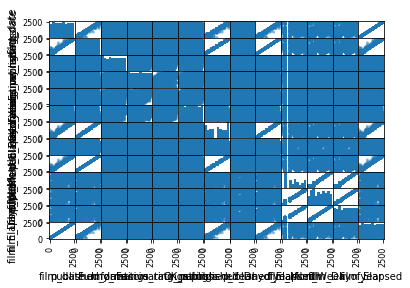

In [45]:
pd.plotting.scatter_matrix(reduced_X.rank());

# Ted Talk Data without Date-Time Parts
After seeing that the models which included Date-Time parts for film_date and published_date did not yield a great model (it had too many features, and variability), I decided to try and find the best model if I excluded the Date-Time parts from the Ted Talk data.

In [46]:
ted_data_no_dates = pd.read_feather('ted_data_no_dates')

In [47]:
ted_data_no_dates.head()

,views,comments,duration,film_date,languages,num_speaker,published_date,Funny_ratings,Beautiful_ratings,Ingenious_ratings,...,is_design_tags,is_ society_tags,is_global issues_tags,is_health_tags,is_TEDx_tags,is_ TEDx_tags,is_innovation_tags,is_technology_tags,title_length,days_between_published_date_and_film_date
0,47227110,4553,1164,1140825600,60,1,1151367060,19645.0,4573.0,6073.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,123
1,3200520,265,977,1140825600,43,1,1151367060,544.0,58.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,123
2,1636292,124,1286,1140739200,26,1,1151367060,964.0,60.0,183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16,124
3,1697550,200,1116,1140912000,35,1,1151367060,59.0,291.0,105.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,122
4,12005869,593,1190,1140566400,48,1,1151440680,1390.0,942.0,3202.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,126


In [48]:
ted_data_no_dates.isnull().values.any()

False

In [49]:
no_dates_y = ted_data_no_dates.views
no_dates_X = ted_data_no_dates.drop(columns=['views'])

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [51]:
no_dates_X_train, no_dates_X_test, no_dates_y_train, no_dates_y_test = train_test_split(no_dates_X, no_dates_y, test_size=0.3, random_state=35)

In [52]:
from sklearn.feature_selection import RFECV
model = LinearRegression(n_jobs = -1)
rfecv = RFECV(model, cv = 5)
with_dates_X_train_rfecv = rfecv.fit(no_dates_X_train,no_dates_y_train)

In [53]:
grid_scores = with_dates_X_train_rfecv.grid_scores_
x_value_range = list(range(0, len(grid_scores)))[::-1]

In [54]:
from graph import trace_values, plot
score_trace = trace_values(x_value_range, grid_scores)
plot([score_trace])

In [55]:
grid_scores

array([-1.34726189e-03,  2.63348407e-04,  7.58199373e-03,  7.27310496e-03,
        1.22096999e-02,  2.07282410e-02,  2.24236408e-02,  2.54073369e-02,
        2.67619833e-02,  3.32498500e-02,  3.48696577e-02,  3.41958198e-02,
        3.43996570e-02,  3.48285176e-02,  3.45929583e-02,  3.44124891e-02,
        6.60406322e-02,  1.21249545e-01,  1.45479328e-01,  1.76058017e-01,
        2.27897126e-01,  2.28894570e-01,  2.70665017e-01,  3.88529556e-01,
        3.89440335e-01,  3.95197311e-01,  4.39076595e-01,  4.37835678e-01,
        4.55162802e-01,  4.56395444e-01,  5.33317262e-01,  5.79494077e-01,
        6.10823020e-01,  6.40234543e-01,  6.51843523e-01,  6.60605078e-01,
        6.60442816e-01,  6.60554959e-01,  6.55699974e-01,  6.52958419e-01,
        6.53944691e-01,  6.54449367e-01,  6.55784615e-01,  6.70517395e-01,
        6.70529927e-01])

In [56]:
no_dates_X_train, no_dates_X_validate, no_dates_y_train, no_dates_y_validate = train_test_split(no_dates_X_train, no_dates_y_train, test_size=0.3, random_state=35)

In [57]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import numpy as np

selectors = []

for idx in list(range(1, 45, 1))[::-1]:
    # 1. create an estimator
    estimator = LinearRegression(n_jobs=-1)
    # 2. perform rfe with the idx number of features
    rfe = RFE(estimator, idx, step=1)
    # 3. reduce the dataset to the number of features
    no_dates_X_train_rfe = rfe.fit_transform(no_dates_X_train,with_dates_y_train)
    no_dates_X_validate_rfe = rfe.transform(no_dates_X_validate)
    # 4. compute the accuracy score and append to the list
    estimator.fit(no_dates_X_train_rfe,no_dates_y_train)
    score = estimator.score(no_dates_X_validate_rfe,no_dates_y_validate)
    selectors.append(np.array([rfe, score, idx]))

In [58]:
wrapped_selectors = np.array(selectors)

In [59]:
y_values = wrapped_selectors[:, 1]
x_values = wrapped_selectors[:, -1]

In [60]:
from graph import trace_values, plot
trace = trace_values(x_values, y_values)
plot([trace])

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ted_data_no_dates)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



StandardScaler(copy=True, with_mean=True, with_std=True)

In [62]:
scaled_data_no_dates = scaler.fit_transform(ted_data_no_dates)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [63]:
scaled_X_no_dates = scaled_data_no_dates[:, 1:]
scaled_y_no_dates = scaled_data_no_dates[:, 0]

In [64]:
no_dates_scaled_X_train, no_dates_scaled_X_test, no_dates_scaled_y_train, no_dates_scaled_y_test = train_test_split(scaled_X_no_dates, scaled_y_no_dates, test_size=0.3, random_state=35)

In [65]:
no_dates_scaled_X_train, no_dates_scaled_X_validate, no_dates_scaled_y_train, no_dates_scaled_y_validate = train_test_split(no_dates_scaled_X_train, no_dates_scaled_y_train, test_size=0.3, random_state=35)

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
model = LinearRegression(n_jobs = -1)
rfecv = RFECV(model, cv = 5)
X_train_rfecv = rfecv.fit(no_dates_scaled_X_train,no_dates_scaled_y_train)

In [67]:
grid_scores = X_train_rfecv.grid_scores_

In [68]:
grid_scores

array([0.45196491, 0.50991524, 0.53086581, 0.57823974, 0.63677793,
       0.65773845, 0.6436627 , 0.65078205, 0.65684618, 0.66321696,
       0.66086934, 0.65813756, 0.66167106, 0.65763973, 0.65703108,
       0.66055652, 0.66273836, 0.66499071, 0.66579458, 0.66487369,
       0.66626894, 0.66664159, 0.66531086, 0.66397672, 0.66317806,
       0.66270874, 0.66194684, 0.66123713, 0.66064946, 0.65989394,
       0.6594088 , 0.65875858, 0.65838214, 0.65814978, 0.65807478,
       0.65851854, 0.65858009, 0.6589757 , 0.65887212, 0.65895163,
       0.6591498 , 0.65911617, 0.65924903, 0.65921678, 0.65924089])

In [69]:
x_value_range = list(range(0, len(grid_scores)))[::-1]

In [70]:
from graph import trace_values, plot
score_trace = trace_values(x_value_range[-50:], grid_scores[-50:])
plot([score_trace])

In [71]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import numpy as np

selectors = []

for idx in list(range(1, 45, 1))[::-1]:
    # 1. create an estimator
    estimator = LinearRegression(n_jobs=-1)
    # 2. perform rfe with the idx number of features
    rfe = RFE(estimator, idx, step=1)
    # 3. reduce the dataset to the number of features
    scaled_X_train_rfe = rfe.fit_transform(no_dates_scaled_X_train,no_dates_scaled_y_train)
    scaled_X_validate_rfe = rfe.transform(no_dates_scaled_X_validate)
    # 4. compute the accuracy score and append to the list
    estimator.fit(scaled_X_train_rfe,no_dates_scaled_y_train)
    score = estimator.score(scaled_X_validate_rfe,no_dates_scaled_y_validate)
    selectors.append(np.array([rfe, score, idx]))

In [72]:
wrapped_selectors = np.array(selectors)

In [73]:
y_values = wrapped_selectors[:, 1]
x_values = wrapped_selectors[:, -1]

In [74]:
from graph import trace_values, plot
trace = trace_values(x_values, y_values)
plot([trace])

In [75]:
wrapped_selectors[-5, 0].estimator_.coef_

array([0.19534479, 0.17259478, 0.20255852, 0.2937685 , 0.21643091])

In [76]:
support = wrapped_selectors[-5, 0].get_support()

In [77]:
import numpy as np
feature_names = np.array(no_dates_X.columns) # transformed list to array
names = feature_names[support]
names

array(['Funny_ratings', 'Courageous_ratings', 'Informative_ratings',
       'Fascinating_ratings', 'OK_ratings'], dtype=object)

In [78]:
names = feature_names[support]
reduced_X = no_dates_X[names]

In [79]:
reduced_X.corr(method = 'spearman')

,Funny_ratings,Courageous_ratings,Informative_ratings,Fascinating_ratings,OK_ratings
Funny_ratings,1.000000,0.163596,0.271243,0.495843,0.479794
Courageous_ratings,0.163596,1.000000,0.219534,0.153367,0.129478
Informative_ratings,0.271243,0.219534,1.000000,0.617411,0.446531
Fascinating_ratings,0.495843,0.153367,0.617411,1.000000,0.457090
OK_ratings,0.479794,0.129478,0.446531,0.457090,1.000000


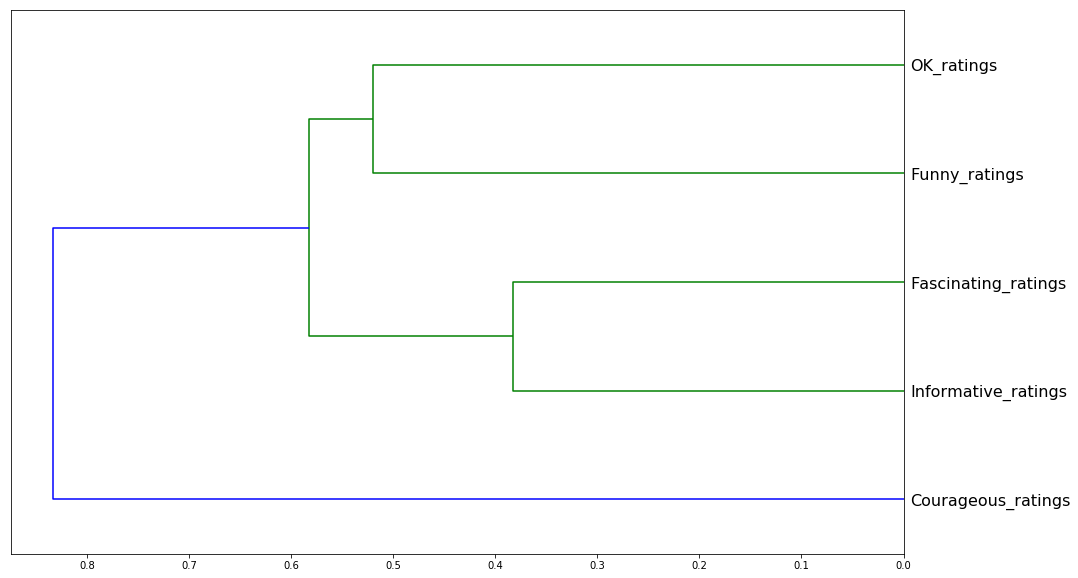

In [80]:
import numpy as np
import scipy.cluster.hierarchy as hc
corr = reduced_X.corr(method = 'spearman')
corr_condensed = hc.distance.squareform(1 - np.abs(corr))
z = hc.linkage(corr_condensed, method = 'average')

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels = reduced_X.columns, orientation = 'left', leaf_font_size=16)

As the Fascinating_ratings and Informative Ratings are highly correlated, as seen in the spearman correlation matrix, with a correlation of ~0.62, I decided to remove the Fascinating_Ratings column to see if the R squared improved.

In [81]:
removed_fascinating_X = np.array(reduced_X)[:,[0,1,2,4]]

X_train_removed_f, X_test_removed_f, y_train_removed_f, y_test_removed_f = train_test_split(removed_fascinating_X , no_dates_y, test_size=0.30, random_state=35)
X_train_removed_f, X_validate_removed_f, y_train_removed_f, y_validate_removed_f = train_test_split(X_train_removed_f , y_train_removed_f, test_size=0.30, random_state=35)

In [82]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_removed_f, y_train_removed_f)
model.score(X_validate_removed_f, y_validate_removed_f)

0.7084453649937703

This R squared is higher than the R squared that I got above for a model with 4 features, so I decided to test this as my model in addition to the model with 5 features.

In [83]:
scaler.inverse_transform(scaled_data_no_dates)

array([[4.72271100e+07, 4.55300000e+03, 1.16400000e+03, ...,
        5.42101086e-20, 2.70000000e+01, 1.23000000e+02],
       [3.20052000e+06, 2.65000000e+02, 9.77000000e+02, ...,
        5.42101086e-20, 2.70000000e+01, 1.23000000e+02],
       [1.63629200e+06, 1.24000000e+02, 1.28600000e+03, ...,
        5.42101086e-20, 1.60000000e+01, 1.24000000e+02],
       ...,
       [3.75647000e+05, 1.00000000e+01, 6.51000000e+02, ...,
        5.42101086e-20, 5.70000000e+01, 1.51000000e+02],
       [4.19309000e+05, 3.20000000e+01, 1.10000000e+03, ...,
        5.42101086e-20, 4.40000000e+01, 7.60000000e+01],
       [3.91721000e+05, 8.00000000e+00, 5.19000000e+02, ...,
        5.42101086e-20, 5.00000000e+01, 1.52000000e+02]])

In [84]:
model = LinearRegression(n_jobs = -1)

In [85]:
model.fit(no_dates_X_train[feature_names[support]],no_dates_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [86]:
model.score(no_dates_X_test[feature_names[support]], no_dates_y_test)

0.863591080901925

In [87]:
model_no_f = LinearRegression(n_jobs = -1)

In [88]:
model_no_f.fit(X_train_removed_f,y_train_removed_f)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [89]:
model_no_f.score(X_test_removed_f,y_test_removed_f)

0.8173711527311136

After testing both models, the one with 5 features, and the one where I removed the Fascinating_ratings feature because of its high correlation with the Informative_ratings feature, I decided to use the model with 5 features, as the R squared on the test dataset was 5% greater than the R squared of the model without the Fascinating_ratings feature

In [90]:
model.intercept_

189431.56141358498

In [91]:
model.coef_, feature_names[support]

(array([ 828.43944974,  994.05044724,  936.80849527, 1175.23212579,
        5986.94530718]),
 array(['Funny_ratings', 'Courageous_ratings', 'Informative_ratings',
        'Fascinating_ratings', 'OK_ratings'], dtype=object))

# Meaning of the Model
The model that we determined to be the best had 5 feautures. <bR>
Those 5 features are the number of Funny ratings, Courageous ratings, Informative ratings, Fascinating ratings, and OK ratings. <br>
We can use these 5 features to predict how many views a video will get. <br>
The exact formula is:
    Views = 828.43944974 * Funny_ratings + 994.05044724 * Courageous_ratings + 936.80849527 * Informative_ratings + 1175.23212579 * Fascinating_ratings + 5986.94530718 * OK_ratings + 189431.56141358498 <br>
This means that if you are planning to deliver a TED talk and want the talk to have a lot of views, you should focus on making the talk Funny, Courageous, Informative, Fascinating, and OK. <br>
In terms of feature importance, the scaled model (based on z-scores) indicates that Fascinating Ratings is the most important feature, as it has the highest coefficient when all variables are scaled the same way. <br>
This scaled model has an R squared of 0.69 on the validation set, meaning that 69% of the variability in the data can be explained by these features. <br>
When the model is tested on the test data, the model performs even better with an R squared of 0.86. <br>

So, to give the best TED talk, you should focus on making it fascinating, funny, informative, courageous, and just OK.
